In [17]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
# import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [26]:
import h5py
def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
#     print(classes)
#     print(train_set_y_orig.shape[0])
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

obj=load_dataset
print(obj)

<function load_dataset at 0x000002541E62C1F8>


In [27]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [74]:
def creating_model(input_shape):
    X_input=Input(input_shape)
    X=ZeroPadding2D((3,3))(X_input)
    X=Conv2D(32,(5,5),strides=(1,1),name='conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X=MaxPooling2D((2,2),name='Maxpooling1')(X)
    X=Flatten()(X)
    X=Dense(1,activation='sigmoid',name='Fully_connected')(X)
    model=Model(inputs=X_input, outputs=X, name='emotion_detection_model')
    
    return model

In [75]:
happyModel=creating_model(X_train.shape[1:])
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 70, 70, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 66, 66, 32)        2432      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 66, 66, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 66, 66, 32)        0         
_________________________________________________________________
Maxpooling1 (MaxPooling2D)   (None, 33, 33, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 34848)             0         
__________

In [76]:
happyModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
happyModel.fit(X_train, Y_train, epochs=6, batch_size=32)

Epoch 1/6
600/600 [==============================] - 3s - loss: 0.0353 - acc: 0.9883     
Epoch 2/6
600/600 [==============================] - 3s - loss: 0.0326 - acc: 0.9917     
Epoch 3/6
600/600 [==============================] - 3s - loss: 0.0345 - acc: 0.9883     
Epoch 4/6
600/600 [==============================] - 3s - loss: 0.0394 - acc: 0.9900     
Epoch 5/6
600/600 [==============================] - 3s - loss: 0.0298 - acc: 0.9917     
Epoch 6/6
600/600 [==============================] - 3s - loss: 0.0286 - acc: 0.9917     - ETA: 1s - loss: 0.0225 - ac


In [81]:
pred=happyModel.predict(X_test[:3])
print("Loss:",pred[0])
print("Test Accuracy",pred[1])

Loss: [0.99456847]
Test Accuracy [0.8740882]


In [89]:
print(happyModel.evaluate(X_test, Y_test, batch_size=32))


128/150 [========================>.....] - ETA: 0s[0.1345342101653417, 0.9533333373069763]


# Testing with my own real image 

[[0.]]
unhappy


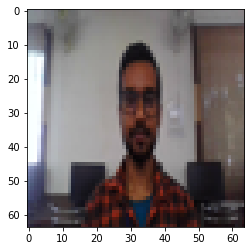

In [105]:
img_path='me.jpg'
img=image.load_img(img_path, target_size=(64,64))
imshow(img)

res=['Happy','Unhappy']

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
result=happyModel.predict(x)
print(result)
for i in result:
    if(i[0]==1.):
        print('happy')
    else:
        print("unhappy")